In [ ]:
!jupyter nbconvert "/content/Twitter_US_Airline_Sentiment_Project.ipynb" --output "Twitter US Airline Sentiment Project"

[NbConvertApp] Converting notebook /content/Twitter_US_Airline_Sentiment_Project.ipynb to html
[NbConvertApp] Writing 2075132 bytes to /content/Twitter US Airline Sentiment Project.html


# **Twitter US Airline Sentiment**

##**Author's View**

Social media has evolved into a major business. Billions of dollars have been invested into this platform and the return on investment has paid off beyond anyone’s imagination. Starting with the invention of Morse’s code to today’s Twitter, TikTok, Facebook, etc. reaching target segments to sell your product and services has never been easier (The Evolution of Social Media). Social media has made it easy for companies to reach their target segments and it has also made it easier for the end-users to share how they feel about a company’s products and services. Reviews on platforms from everyday people tend to be more reliable than getting reviews from so-called industry experts. These reviews share how an end-user truly feel about the product or services in real-time. End-users express if they had a pleasant experience, or if the customer service was horrible. I personally read reviews on a business or product before making a decision if I want to eat at the restaurant, stay at a hotel, etc. I would like to end my comments with this quote, "Human beings are social creatures. Commerce is driven by human interaction. These two facts will continue to shape the evolution of social media into the next decade and beyond” (The Evolution of Social Media). This statement sums up why sentiment analysis is so important in driving a business strategy for growth.

**Background and Context:**

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.



**Data Description:**

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").



**Dataset:**

The dataset has the following columns:

* tweet_id                                                           
* airline_sentiment                                               
* airline_sentiment_confidence                               
* negativereason                                                   
* negativereason_confidence                                    
* airline                                                                    
* airline_sentiment_gold                                              
* name     
* negativereason_gold
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location
* user_timezone


**Objective:**

To implement the techniques learned as a part of the course.


##**Installing Contractions**

In [ ]:
!pip install contractions

# (Greatlearning login)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 5.1 MB/s eta 0:00:00


##**Loading Libraries**

In [ ]:
# import necessary libraries.

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE                # Handling Imbalanced

from sklearn.ensemble import RandomForestClassifier

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# (Greatlearning login)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Natural Language Processing /Natural Language Processing Week 2/Tweets.csv')

#**Exploratory Data Analysis (EDA)**

In [ ]:
data.shape                                               # print shape of data.

(14640, 15)

* The data set has 14,640 rows and 15 columns.

In [ ]:
data.info()    #information of all columns in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
# view some basic statistical details like percentile, mean, std etc. of a data frame of numeric values.
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


#**Insights**

* Average airline_sentiment_confidence is 0.9
* Average negativereason_confidence is 0.64
* Average retweet_count is 0.08
* Maximum retweet_count is 44

In [ ]:
data.head()                                              # Print first 5 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
data.isnull().sum(axis=0)          # Check for NULL values.

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

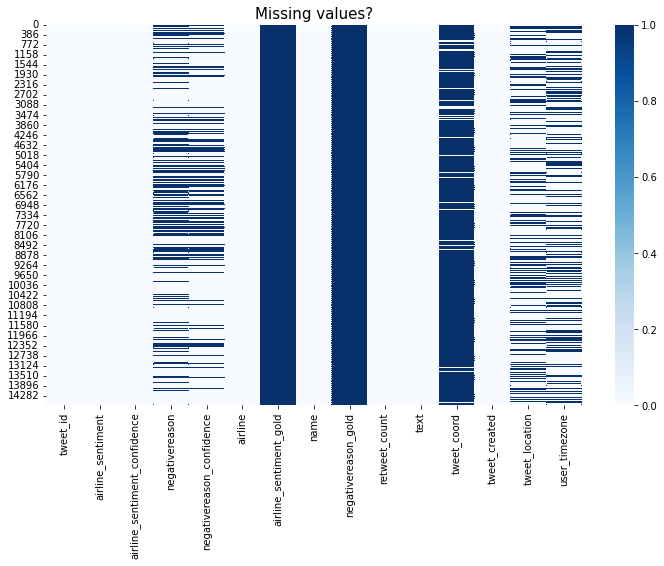

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(data.isnull(), cmap = "Blues")                       #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

# (Greatlearning login)

* The lines in the above heatmap visualizes the location of missing values (i.e. the missing value indexes in the dataframe).

In [ ]:
# check the missing values for all the columns
def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

#plot the count of missing values in every column
def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='darkgrid')
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.title('Bar plot for Null Values in each column')
    plt.xticks(rotation=90)
    plt.show()

# (Greatlearning login)

In [ ]:
# get the count of missing values in every column of the dataframe
return_missing_values(data)

# (Greatlearning login)

negativereason_confidence     4118
tweet_location                4733
user_timezone                 4820
negativereason                5462
tweet_coord                  13621
airline_sentiment_gold       14600
negativereason_gold          14608
dtype: int64

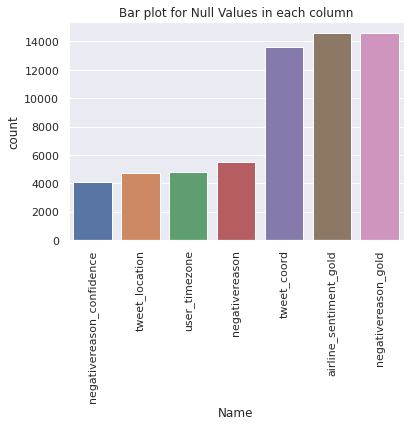

In [ ]:
#plotting the count of missing values
plot_missing_values(data)

# (Greatlearning login)

* We can see that more data is missing from the **tweet_coord**, **airline_sentiment_gold**, and **negativereasone_gold** columns

In [ ]:
#get the unique values of every column
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

# (Greatlearning login)

In [ ]:
unidf = return_unique_values(data)
print(unidf)

# (Greatlearning login)

                        Features  Uniques
0                       tweet_id    14485
1              airline_sentiment        3
2   airline_sentiment_confidence     1023
3                 negativereason       10
4      negativereason_confidence     1410
5                        airline        6
6         airline_sentiment_gold        3
7                           name     7701
8            negativereason_gold       13
9                  retweet_count       18
10                          text    14427
11                   tweet_coord      832
12                 tweet_created    14247
13                tweet_location     3081
14                 user_timezone       85


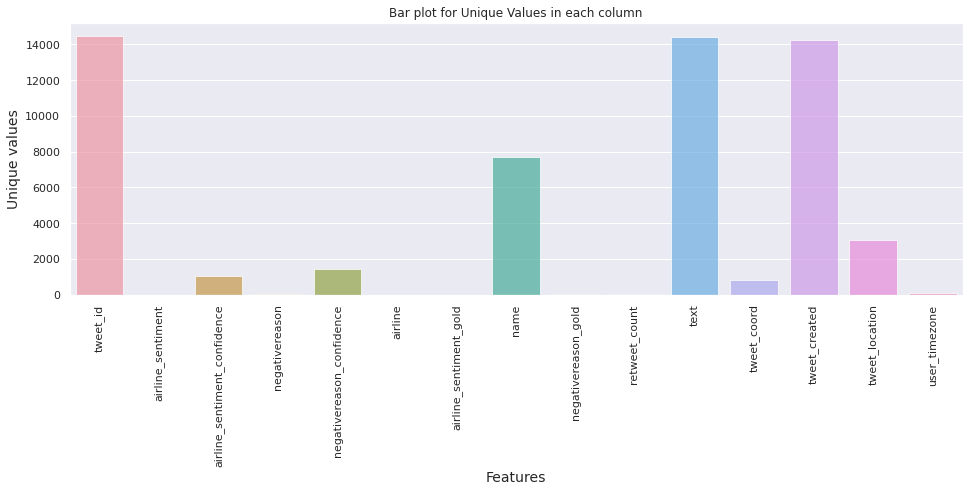

In [ ]:
# plot the count of unique values in every column
f, ax = plt.subplots(1,1, figsize=(16,5))
sns.barplot(x=unidf['Features'], y=unidf['Uniques'], alpha=0.7)
plt.title('Bar plot for Unique Values in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.show()

# (Greatlearning login)

* Visual analysis of the number of unique values in every column

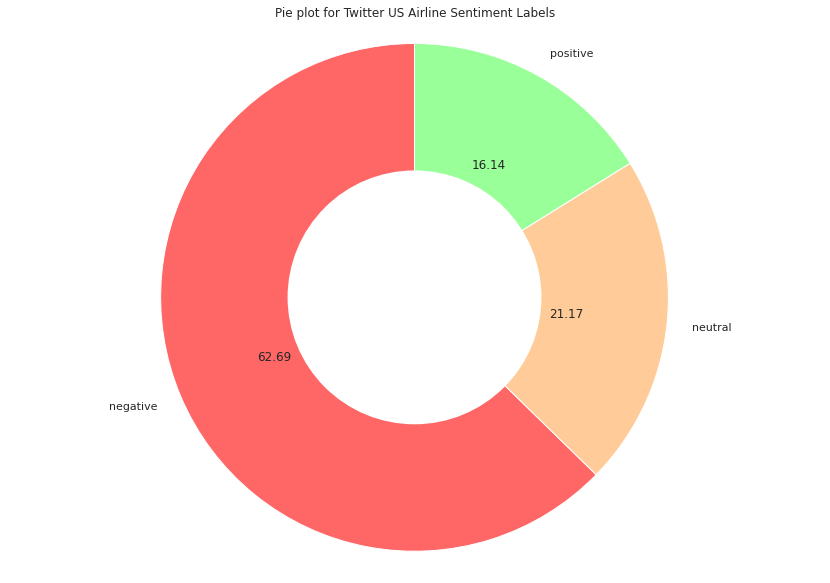

In [ ]:
#plot for Twitter US Airline Sentiment Labels
#Using matplotlib
colors = ['#ff6666', '#ffcc99', '#99ff99']

sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = plt.pie(data['airline_sentiment'].value_counts(), labels=data['airline_sentiment'].value_counts().index, colors=colors, startangle=90,  autopct='%.2f')
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Pie plot for Twitter US Airline Sentiment Labels')
plt.axis('equal')
plt.tight_layout()
plt.show()

# (Greatlearning login)

* **Most of the tweets are negative in nature** (62.69%), which indicates a wide displeasure among passengers on the airlines, followed by 21.17% neutral and 16.17% positive tweets.

Total Number of Sentiments of Tweets : green
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


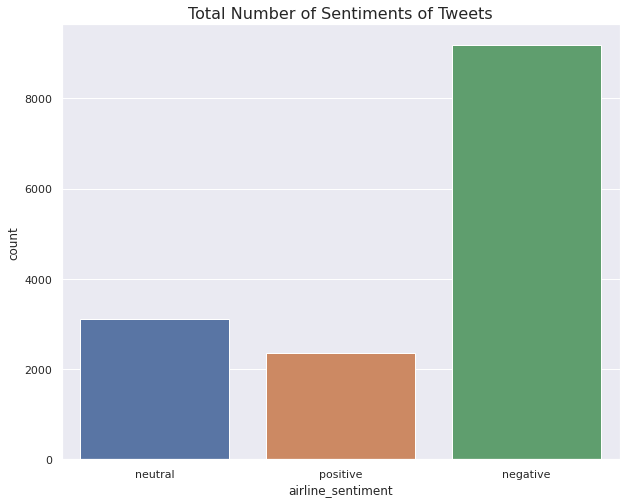

In [ ]:
print("Total Number of Sentiments of Tweets :",'green')
print(data.airline_sentiment.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline_sentiment', data = data)
ax.set_title(label = 'Total Number of Sentiments of Tweets', fontsize = 16)
plt.show()

# (Twitter US Airline Sentiment Analysis 96%Acc)

* Total number of negative sentiments tweeted is 9178, followed by neutral sentiments at 3099, and positive sentiments at 2363.

##**Let's see the number of tweets per airline**

Text(0, 0.5, 'No.of Tweets')

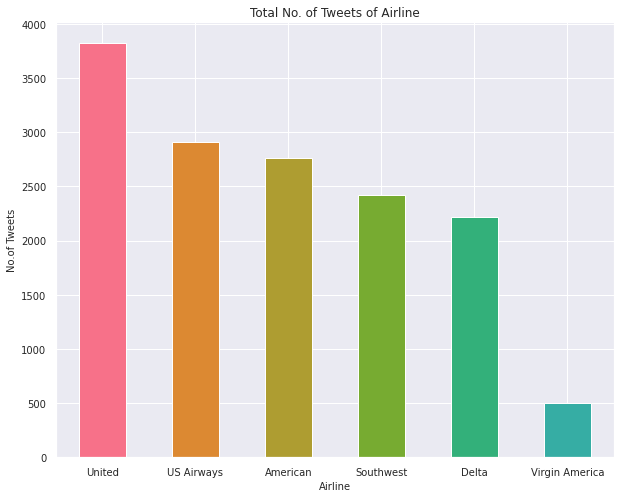

In [ ]:
colors=sns.color_palette('husl',10)
pd.Series(data['airline']).value_counts().plot(kind="bar",color=colors,figsize=(10,8),fontsize=10,rot=0,title='Total No. of Tweets of Airline')
plt.xlabel('Airline',fontsize=10)
plt.ylabel('No.of Tweets',fontsize=10)

# (Twitter US Airline Sentiment Analysis 96%Acc)

* United has the most tweets, followed by US Airways, and American.

Total Number of Tweets for each Airline : green
airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


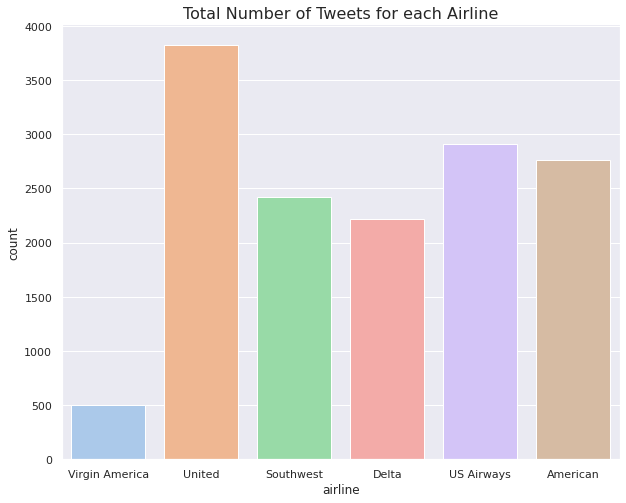

Total Number of Sentiment Tweets for each Airline : green
US Airways : 
 negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64
United : 
 negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64
American : 
 negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64
Southwest : 
 negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64
Delta : 
 negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64
Virgin America : 
 negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64


In [ ]:
print("Total Number of Tweets for each Airline :",'green')
print(data.groupby('airline')['airline_sentiment'].count())

plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline', data = data, palette = 'pastel')
ax.set_title(label = 'Total Number of Tweets for each Airline', fontsize = 16)
plt.show()

print("Total Number of Sentiment Tweets for each Airline :",'green')
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines :
    print('{} : \n'.format(i),data.loc[data.airline == i].airline_sentiment.value_counts())

# (Twitter US Airline Sentiment Analysis 96%Acc)

##**Let's look at the reasons for Negative Tweets**

Reasons Of Negative Tweets : green
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


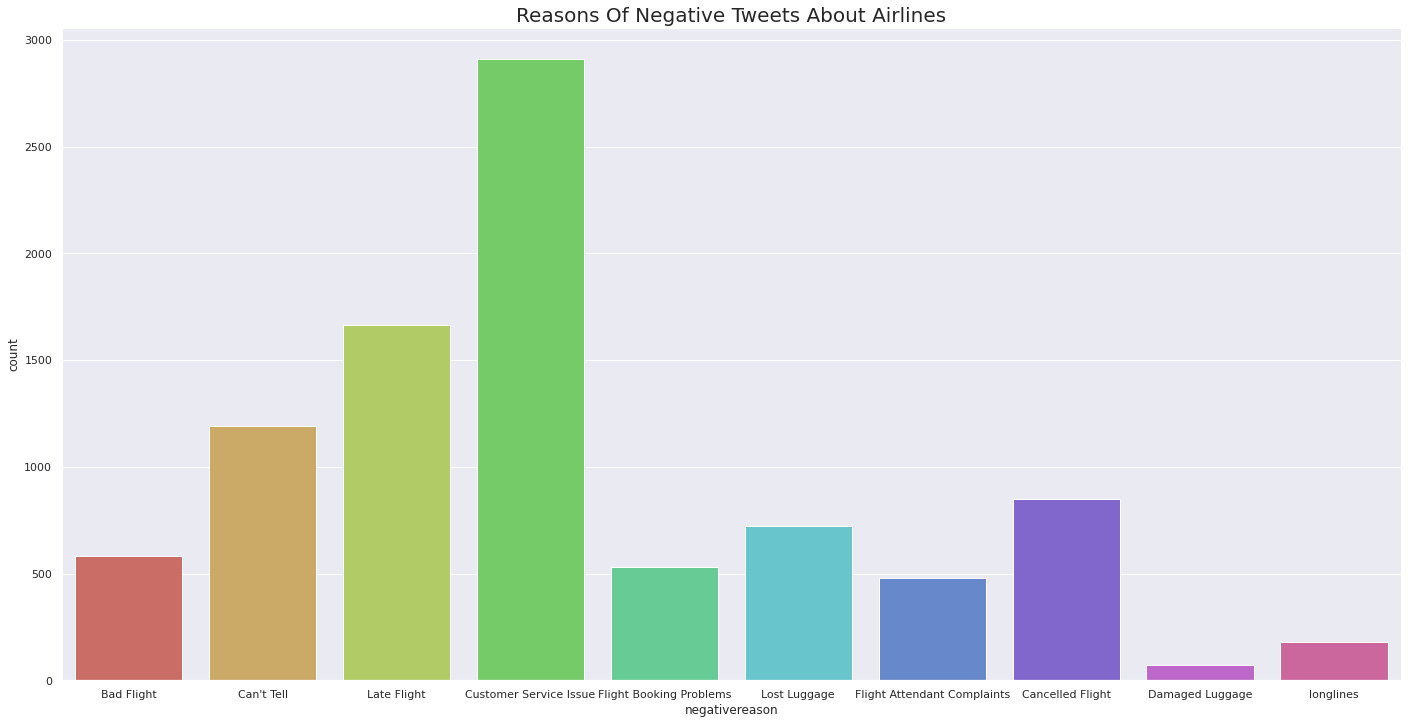

In [ ]:
print('Reasons Of Negative Tweets :','green')
print(data.negativereason.value_counts())

plt.figure(figsize = (24, 12))
sns.countplot(x = 'negativereason', data = data, palette = 'hls')
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()

# (Twitter US Airline Sentiment Analysis 96%Acc)

**Insights**

* The number one reason for negative tweets are **Customer Service Issue**, followed by **Late Flight**, and **Cant't Tell**

##**Let's look at Reasons of Negative Tweets on each Airline**

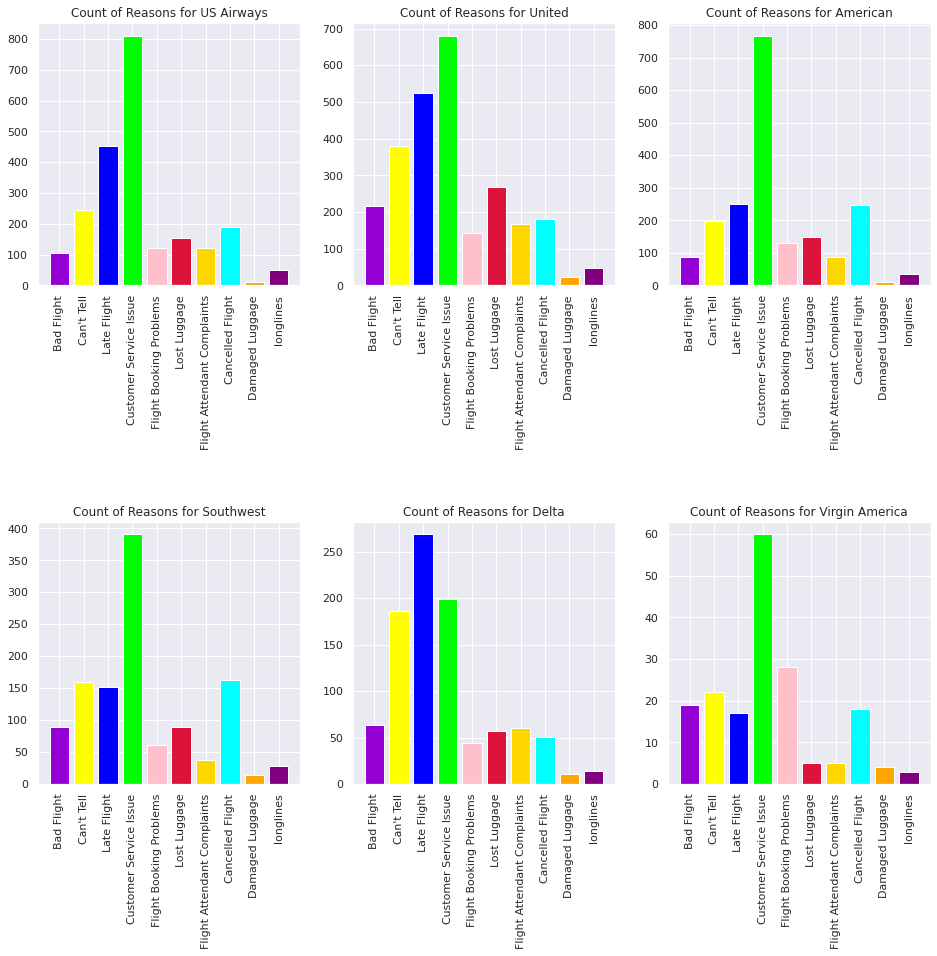

In [ ]:
NR_Count=data['negativereason'].value_counts()
def NCount(Airline):
    airlineName =data[data['airline']==Airline]
    count= airlineName['negativereason'].value_counts()
    Unique_reason= data['negativereason'].unique()
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def Plot_Reason(airline):
    a= NCount(airline)
    count=a['count']
    Id = range(1,(len(a)+1))
    plt.bar(Id,count, color=['darkviolet','yellow','blue','lime','pink','crimson','gold','cyan','orange','purple'])
    plt.xticks(Id,a['Reasons'],rotation=90)
    plt.title('Count of Reasons for '+ airline)

plt.figure(2,figsize=(16, 14))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    Plot_Reason(i)

# (Twitter US Airline Sentiment Analysis 96%Acc)

**Insights**

* **US Airways top 3 Reasons for Negative Tweets**
  * Customer Service Issue
  * Late Flight
  * Can't Tell

* **United top 3 Reasons for Negative Tweets**
  * Customer Service Issue
  * Late Flight
  * Can't Tell

* **American top 3 Reasons for Negative Tweets**
  * Customer Service Issue
  * Late Flight
  * Cancelled Flight

* **Southwest top 3 Reasons for Negative Tweets**
  * Customer Service Issue
  * Can't Tell and Cancelled Flight seem to be tied for second

* **Delta top 3 Reasons for Negative Tweets**
  * Late Flight
  * Customer Service Issue
  * Can't Tell

* **Virgin America top 3 Reasons for Negative Tweets**
  * Customer Service Issue
  * Flight Booking Problems
  * Can't Tell




##**Let's Split Text of Sentiments**


In [ ]:
positive=data[data['airline_sentiment']=='positive'].text
neutral=data[data['airline_sentiment']=='neutral'].text
negative=data[data['airline_sentiment']=='negative'].text

# (Twitter US Airline Sentiment Analysis 96%Acc)

##**Let's look at a Word Cloud of Positive Sentiments**

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
positive_tweets=data[data['airline_sentiment']=='positive']
words = ' '.join(positive_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

# (Greatlearning login)

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

# (Greatlearning login)

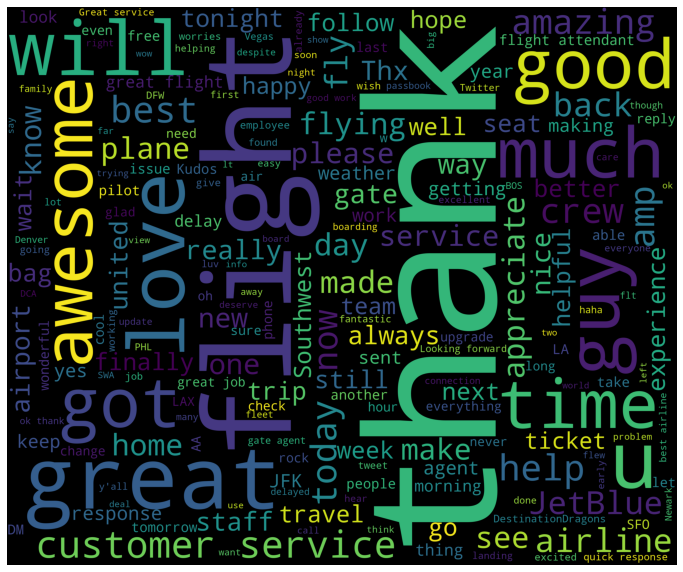

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# (Greatlearning login)

* thank, flight, awesome, great, time, love, guy, good, JetBlue, much, customer service are the most common positive terms

##**Let's look at a Word Cloud of Negative Sentiments**

In [ ]:
negative_tweets=data[data['airline_sentiment']=='negative']
words = ' '.join(negative_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

# (Greatlearning login)

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

# (Greatlearning login)

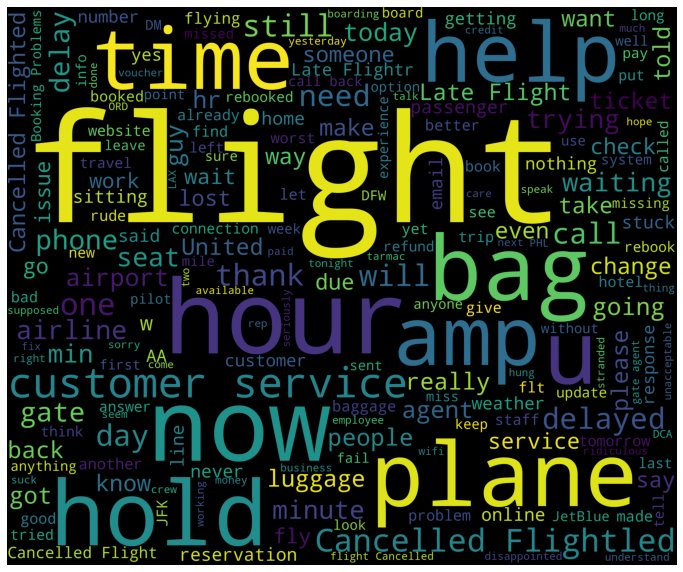

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# (Greatlearning login)

* flight, time, hold, hour, help, bag, amp, plane, now, customer, service, delayed, Cancelled Flight, led are some of the most common negative terms

##**Let's drop all other columns except "text" and "airline_sentiment"**

In [ ]:
data = data[['text', 'airline_sentiment']]
data.columns                                # Print the column of the dataframe

Index(['text', 'airline_sentiment'], dtype='object')

In [ ]:
data.shape                                  # Shape of new data

(14640, 2)

In [ ]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

# (Greatlearning login)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


#**Text Pre-processing:**

- HTML tag removal.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove the numbers.
- Tokenization
- Removal of Stopwords.
- Removal of Special Characters and Punctuations
- Conversion to lowercase
- Lemmatized data
- Join the words in the list to convert back to text string in the data frame

We have used the **NLTK library to tokenize words, remove stopwords and lemmatize the remaining words**

# (Greatlearning login)

# **HTML tag removal.**

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data['airline_sentiment'] = data['airline_sentiment'].apply(lambda x: strip_html(x))

data.head()

# (Greatlearning login)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


#**Replace contractions**

In [ ]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data['airline_sentiment'] = data['airline_sentiment'].apply(lambda x: replace_contractions(x))

data.head()

# (Greatlearning login)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


#**Remove the numbers**

In [ ]:
def remove_numbers(text):
  text = re.findall(r"[^\W\d_]+|\d+", text)
  return " ".join(text)

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data['airline_sentiment'] = data['airline_sentiment'].apply(lambda x: remove_numbers(x))

data.head()


# (Twitter US Airline Sentiment Analysis 96%Acc)

,text,airline_sentiment
0,VirginAmerica What dhepburn said,neutral
1,VirginAmerica plus you have added commercials to the experience tacky,positive
2,VirginAmerica I did not today Must mean I need to take another trip,neutral
3,VirginAmerica it is really aggressive to blast obnoxious entertainment in your guests faces they have little recourse,negative
4,VirginAmerica and it is a really big bad thing about it,negative


#**Tokenization**

In [ ]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
data['airline_sentiment'] = data.apply(lambda row: nltk.word_tokenize(row['airline_sentiment']), axis=1) # Tokenization of data
data.head()   # Look at how tokenized data looks.

# (Greatlearning login)

,text,airline_sentiment
0,"[VirginAmerica, What, dhepburn, said]",[neutral]
1,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]",[positive]
2,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]",[neutral]
3,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]",[negative]
4,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",[negative]


#**Removal of Stopwords**

In [ ]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))

# (Greatlearning login)

##**Let's Normalize the data**

In [ ]:
import nltk
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data['airline_sentiment'] = data.apply(lambda row: normalize(row['airline_sentiment']), axis=1)
data.head()

# (Greatlearning login)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica not today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative
4,virginamerica really big bad thing,negative


### **Building the model based on CountVectorizer and Random Forest**

In [ ]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(data['text'])

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transform our training data
# into feature vectors. The input to fit_transform should be a list of
# strings.

data_features = data_features.toarray()                        # Convert the data features to array.

# (Greatlearning login)

In [ ]:
data_features.shape

# (Greatlearning login)

(14640, 2000)

In [ ]:
# convert Sentiments to 0,1,2
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

# (Twitter US Airline Sentiment Analysis 96%Acc)

In [ ]:
# Apply convert_Sentiment function
data.airline_sentiment = data.airline_sentiment.apply(lambda x : convert_Sentiment(x))

# (Twitter US Airline Sentiment Analysis 96%Acc)

In [ ]:
data.airline_sentiment

# (Twitter US Airline Sentiment Analysis 96%Acc)

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [ ]:
labels = data['airline_sentiment']
labels = labels.astype('int')

# (Greatlearning login)

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

# (Greatlearning login)

In [ ]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

# (Greatlearning login)

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7157103825136613


### **Optimizing the parameter: Number of trees in the random forest model(n_estimators)**

In [ ]:

# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

# (Greatlearning login)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

# (Greatlearning login)

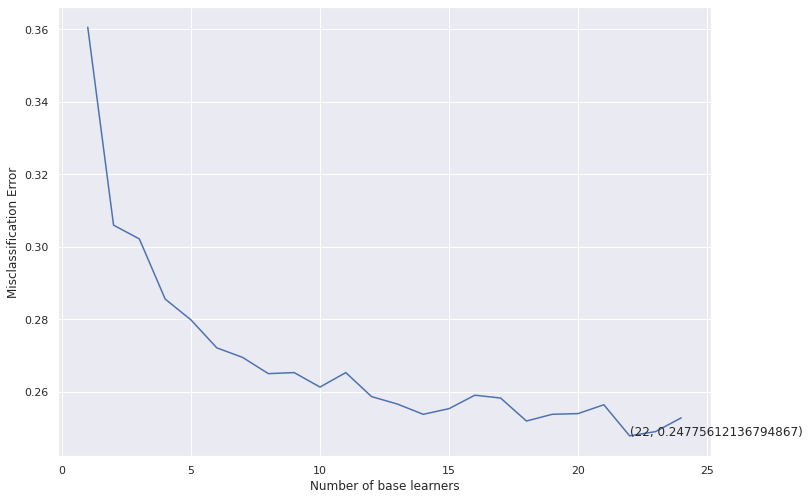

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each no. of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal no. of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each no. of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

# (Greatlearning login)

In [ ]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

# (Greatlearning login)

0.7695810564663024

In [ ]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

# (Greatlearning login)

[[2562  181   71]
 [ 401  404   79]
 [ 186   94  414]]
0.7695810564663024


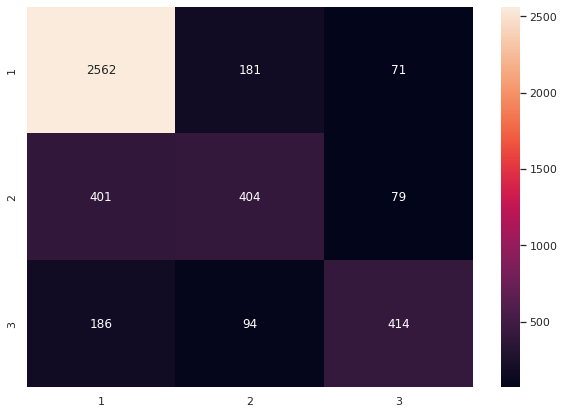

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

# (Greatlearning login)

### **Word Cloud of top 40 important features from the CountVectorizer + Random Forest based model**

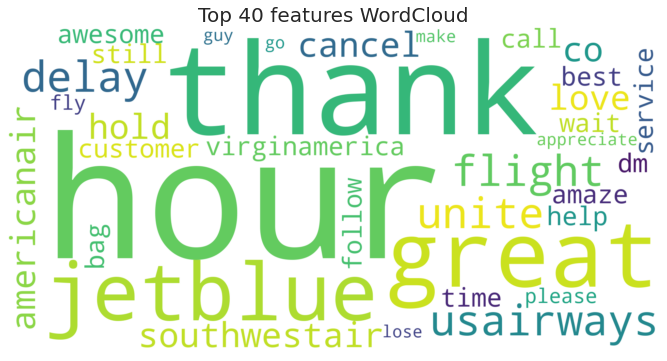

In [ ]:


all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '



from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000,
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

# (Greatlearning login)

* hour, thank, jetblue, us airways, unite, and southwest air are some of the Word Cloud's top 40 important features from the CountVectorizer + Random Forest based model

### **Term Frequency(TF) - Inverse Document Frequency(IDF)**

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

# (Greatlearning login)

(14640, 2000)

##**Let's handle the imbalance data with the SMOTE function**

In [ ]:
# Handling imbalanced using SMOTE
smote = SMOTE()
data_features, labels = smote.fit_resample(data_features, labels)

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

# (Greatlearning login)

In [ ]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

# (Greatlearning login)

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7807068651060028


In [ ]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

# (Greatlearning login)

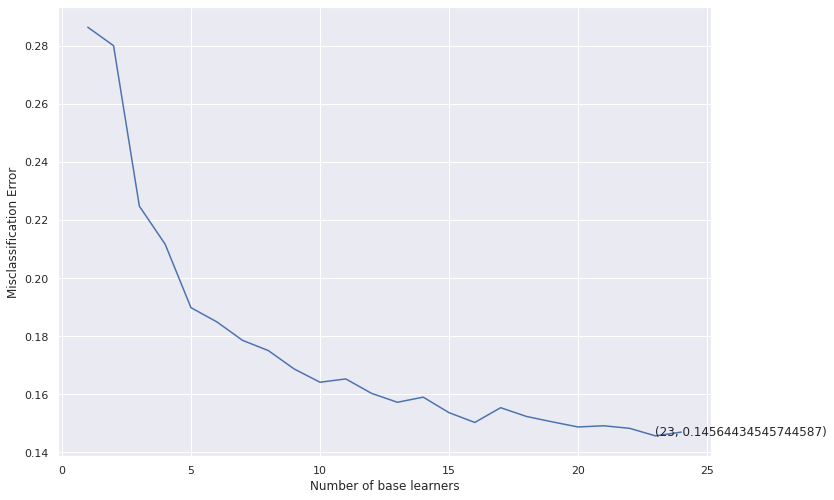

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each no. of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

# (Greatlearning login)

In [ ]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

# (Greatlearning login)

0.8744704030988985

In [ ]:
result = clf.predict(X_test)

# (Greatlearning login)

[[2453  262   92]
 [ 275 2305  128]
 [ 119  161 2466]]
0.8744704030988985


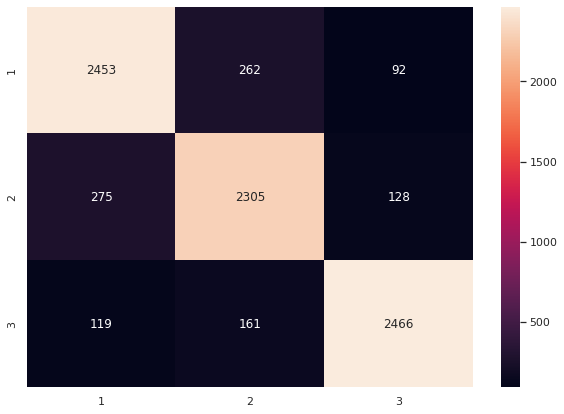

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

# (Greatlearning login)

* Using the SMOTE function for imbalance data has improved our predictions for all classes.

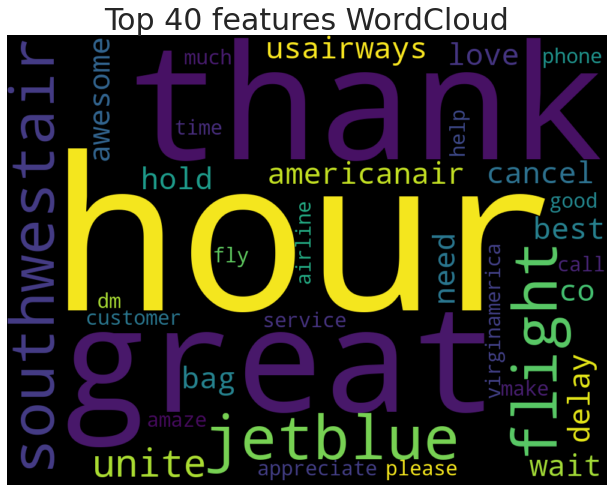

In [ ]:

all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '


from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000,
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

# (Greatlearning login)

* hour, thank, jetblue, southwest air, us airways, unite, and american air  are some of the Word Cloud's top 40 important features from the Term Frequency(TF) - Inverse Document Frequency(IDF) + Random Forest based model

### **Summary**:

- We used a dataset which has **reviews in text format and their sentiment score on the scale of 1 to 3.**
- The goal was to **build a model for text-classification**.
- We used **the text and airline_sentiment columns** to classify the airlines sentiments (negative, nuetral, and positive).
- We **pre-processed the data** using various techniques and libraries.
- We **created a Word Cloud plot** based on summary and high and low score.
- The **pre-processed data is converted to numbers (vectorized)**, so that we can feed the data into the model.
- We trained the model and optimized the parameter, which **led to an increase in the overall accuracy.**
- After building the classification model, we **predicted the results for the test data.**
- We saw that using the above techniques, our model performed well in perspective of how text classification models perform.
- We handled the imbalance of the data when performing the **Term Frequency(TF) - Inverse Document Frequency(IDF) model using the SMOTE function**. This increased the overall accuracy and classified our classes well.

# **References**

Greatlearning Login. https://olympus.mygreatlearning.com/login. Accessed 1 Feb. 2023.

“The Evolution of Social Media: How Did It Begin and Where Could It Go Next?” Maryville Online, 28 May 2020, https://online.maryville.edu/blog/evolution-social-media/.

Twitter US Airline Sentiment Analysis 96%Acc. https://kaggle.com/code/jillanisofttech/twitter-us-airline-sentiment-analysis-96-acc.